In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [96]:
from google.colab import files
files.upload()

Saving credit-HDG.csv to credit-HDG (1).csv


{'credit-HDG.csv': b'Catatan_kredit,Utang,Jaminan,Pendapatan,Risiko\r\nburuk,rendah,tidak_ada,0-15,tinggi\r\ntidak_diketahui,tinggi,tidak_ada,15-35,tinggi\r\ntidak_diketahui,rendah,tidak_ada,15-35,rendah\r\nburuk,rendah,tidak_ada,0-15,tinggi\r\ntidak_diketahui,rendah,ada,>35,rendah\r\ntidak_diketahui,rendah,tidak_ada,>35,rendah\r\ntidak_diketahui,tinggi,tidak_ada,0-15,tinggi\r\nburuk,rendah,ada,>35,tinggi\r\nbaik,rendah,tidak_ada,>35,rendah\r\nbaik,tinggi,ada,>35,rendah\r\nbaik,tinggi,tidak_ada,0-15,tinggi\r\nbaik,tinggi,tidak_ada,15-35,tinggi\r\nbaik,tinggi,tidak_ada,>35,rendah\r\nburuk,tinggi,tidak_ada,15-35,tinggi\r\n'}

In [115]:
df=pd.read_csv('credit-HDG.csv')
df.head()

,Catatan_kredit,Utang,Jaminan,Pendapatan,Risiko
0,buruk,rendah,tidak_ada,0-15,tinggi
1,tidak_diketahui,tinggi,tidak_ada,15-35,tinggi
2,tidak_diketahui,rendah,tidak_ada,15-35,rendah
3,buruk,rendah,tidak_ada,0-15,tinggi
4,tidak_diketahui,rendah,ada,>35,rendah


In [116]:
df.dtypes

Catatan_kredit    object
Utang             object
Jaminan           object
Pendapatan        object
Risiko            object
dtype: object

In [117]:
df.isna()
df.isnull().sum()

Catatan_kredit    0
Utang             0
Jaminan           0
Pendapatan        0
Risiko            0
dtype: int64

In [118]:
col_names = ['Catatan_kredit', 'Utang', 'Jaminan', 'Pendapatan','Risiko']
for col in col_names:
  print(df[col].value_counts())


tidak_diketahui    5
baik               5
buruk              4
Name: Catatan_kredit, dtype: int64
rendah    7
tinggi    7
Name: Utang, dtype: int64
tidak_ada    11
ada           3
Name: Jaminan, dtype: int64
>35      6
0-15     4
15-35    4
Name: Pendapatan, dtype: int64
tinggi    8
rendah    6
Name: Risiko, dtype: int64


In [119]:
from sklearn import preprocessing
le_ck = preprocessing.LabelEncoder()
le_ck.fit(['buruk', 'baik', 'tidak_diketahui' ])
df['Catatan_kredit'] = le_ck.transform(df['Catatan_kredit'])

In [120]:
le_ut = preprocessing.LabelEncoder()
le_ut.fit(['rendah', 'tinggi'])
df['Utang'] = le_ut.transform(df['Utang'])

In [121]:
le_ja = preprocessing.LabelEncoder()
le_ja.fit(['tidak_ada', 'ada'])
df['Jaminan'] = le_ja.transform(df['Jaminan'])

In [122]:
le_pe = preprocessing.LabelEncoder()
le_pe.fit(['0-15', '15-35', '>35'])
df['Pendapatan'] = le_pe.transform(df['Pendapatan'])

In [123]:
df

,Catatan_kredit,Utang,Jaminan,Pendapatan,Risiko
0,1,0,1,0,tinggi
1,2,1,1,1,tinggi
2,2,0,1,1,rendah
3,1,0,1,0,tinggi
4,2,0,0,2,rendah
5,2,0,1,2,rendah
6,2,1,1,0,tinggi
7,1,0,0,2,tinggi
8,0,0,1,2,rendah
9,0,1,0,2,rendah


In [124]:
x = df.drop(['Risiko'], axis=1)
y = df['Risiko']

In [125]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
x_train.shape, x_test.shape

((11, 4), (3, 4))

In [126]:
from sklearn.tree import DecisionTreeClassifier
dtree =  DecisionTreeClassifier(criterion = 'entropy')
dtree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [128]:
predTree_train = dtree.predict(x_train)
hasil_train = pd.DataFrame ({'Predicted_risk' : predTree_train, 'Actual_risk':y_train})
print(hasil_train)

   Predicted_risk Actual_risk
12         rendah      rendah
5          rendah      rendah
8          rendah      rendah
2          rendah      rendah
1          tinggi      tinggi
13         tinggi      tinggi
4          rendah      rendah
7          tinggi      tinggi
10         tinggi      tinggi
3          tinggi      tinggi
6          tinggi      tinggi


In [133]:
predTree_test = dtree.predict(x_test)
hasil_test = pd.DataFrame ({'Predicted_risk' : predTree_test, 'Actual_risk':y_test})
print(hasil_test)

   Predicted_risk Actual_risk
9          tinggi      rendah
11         tinggi      tinggi
0          tinggi      tinggi


In [130]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cnfMatrix_train=confusion_matrix(y_train,predTree_train)
print('Decision trees accuracy:', metrics.accuracy_score(y_train,predTree_train))
cnfMatrix_train

Decision trees accuracy: 1.0


array([[5, 0],
       [0, 6]])

In [134]:
cnfMatrix_test=confusion_matrix(y_test,predTree_test)
print('Decision trees accuracy:', metrics.accuracy_score(y_test,predTree_test))
cnfMatrix_test

Decision trees accuracy: 0.6666666666666666


array([[0, 1],
       [0, 2]])

In [135]:
from sklearn.metrics import classification_report
print(classification_report(y_train, predTree_train))

              precision    recall  f1-score   support

      rendah       1.00      1.00      1.00         5
      tinggi       1.00      1.00      1.00         6

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



In [136]:
print(classification_report(y_test, predTree_test))

              precision    recall  f1-score   support

      rendah       0.00      0.00      0.00         1
      tinggi       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


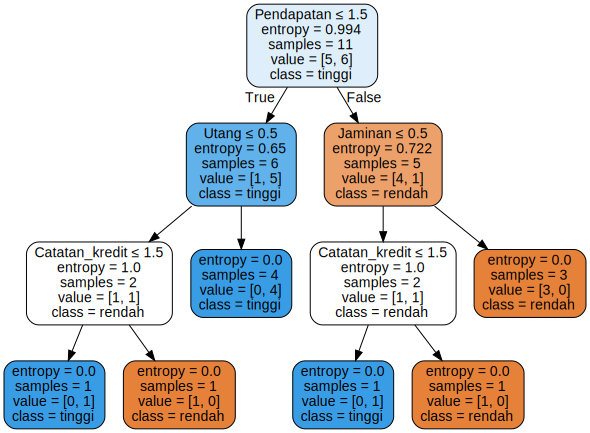

In [142]:
import graphviz
from graphviz import Source
from sklearn import tree
dot_data = tree.export_graphviz(dtree, out_file=None, feature_names=x_train.columns,
                                class_names=np.unique(y_train),filled= True, rounded = True,
                                special_characters = True)
graph = graphviz.Source(dot_data)
graph

In [143]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [144]:
cv = KFold(n_splits=3, random_state=1, shuffle=True)

In [146]:
score = cross_val_score(dtree, x, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [147]:
print('accuracy score of each fold:',score)
print('accuracy: %.ef (%3.f)'% (np.mean(score), np.std(score)))

accuracy score of each fold: [0.6  0.8  0.75]
accuracy: 7e-01f (  0)


In [148]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [149]:
clfs=[]
for ccp_alpha in ccp_alphas:
  clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
  clf.fit(x_train,y_train)
  clfs.append(clf)
print('number of nodes in the last tree is : () with ccp_alpha: ()'.format(clfs[-1].tree_.node_count, ccp_alphas[-1]))


number of nodes in the last tree is : () with ccp_alpha: ()


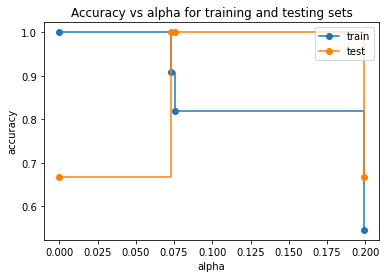

In [150]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel ('accuracy')
ax.set_title('Accuracy vs alpha for training and testing sets')
ax.plot(ccp_alphas, train_scores, marker = 'o', label = 'train', drawstyle = 'steps-post')
ax.plot(ccp_alphas, test_scores, marker = 'o', label = 'test', drawstyle = 'steps-post')
ax.legend()
plt.show()

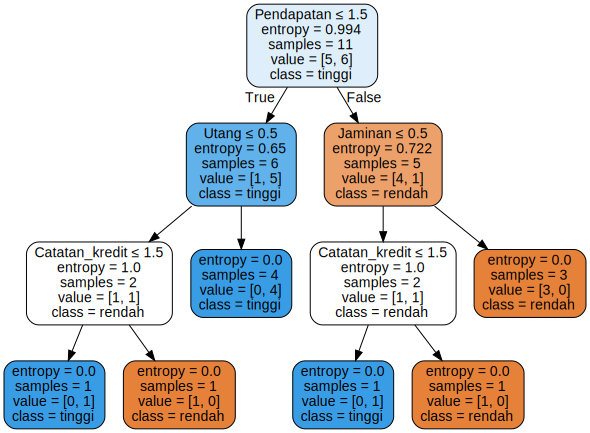

In [151]:
import graphviz
dot_data = tree.export_graphviz(dtree, out_file=None, feature_names=x_train.columns,
                                class_names=np.unique(y_train),filled= True, rounded = True,
                                special_characters = True)
graph = graphviz.Source(dot_data)
graph